Import Library & Data Load


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
print("uplode train and test file ")
uploaded = files.upload()

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Successfully Data load.")
train.head()

uplode train and test file 


Saving test.csv to test.csv
Saving train.csv to train.csv
Successfully Data load.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Cleaning and Missing value handeing


In [ ]:
# Check for missing values before cleaning
print("Missing values in Train set:\n", train.isnull().sum())

# Handle missing values in 'Age' using the median
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

# Handle missing values in 'Embarked' using the most frequent value (mode)
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Drop 'Cabin' column if it exists as it has too many missing values
if 'Cabin' in train.columns:
    train = train.drop(columns=['Cabin'])
if 'Cabin' in test.columns:
    test = test.drop(columns=['Cabin'])

# Sex column number Convert male = 0, female = 1 (Label Encoding)
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Fare column
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Final check to ensure no more missing values
print("\nMissing values after cleaning:\n", train.isnull().sum())


Missing values in Train set:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            891
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

Missing values after cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            891
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


 Feature Selection.

In [ ]:


# (Features selection) 'Survived' colomn remove

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]

X = train[features]       # Input data (trainer )
y = train["Survived"]    # Output (Check result )
X_test = test[features]  # Input data (Test)

print("Data Cleaning & Formatting ")
print(X.head())

Data Cleaning & Formatting 
   Pclass  Sex   Age  SibSp  Parch     Fare
0       3    0  22.0      1      0   7.2500
1       1    1  38.0      1      0  71.2833
2       3    1  26.0      0      0   7.9250
3       1    1  35.0      1      0  53.1000
4       3    0  35.0      0      0   8.0500


Model Training and Validation.

In [ ]:

# Train data-Split (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model choose (Random Forest )
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# 3. Model- training  (Fit )
model.fit(X_train, y_train)

# 4. Validation data  check  model accuracy
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"Model Training  Accuracy: {accuracy * 100:.2f}%")

Model Training  Accuracy: 81.01%


In [ ]:
# 1. Test data prediction
final_predictions = model.predict(X_test)

# 2. Result DataFrame- (Kaggle-er format )
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": final_predictions
})

# 3. Result 'submission.csv' name save
submission.to_csv('submission.csv', index=False)
print(submission.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


#  Survival rate by Passenger Class

/tmp/ipython-input-1618944224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train, palette='viridis')


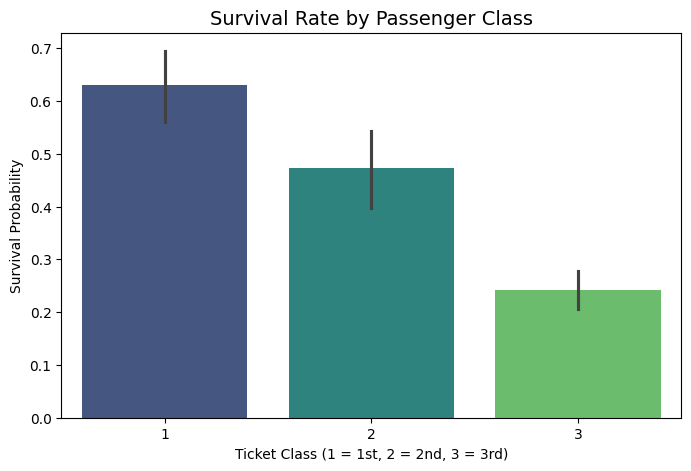

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=train, palette='viridis')
plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.xlabel('Ticket Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Survival Probability')
plt.show()

#  Survival Rate by Age Distribution

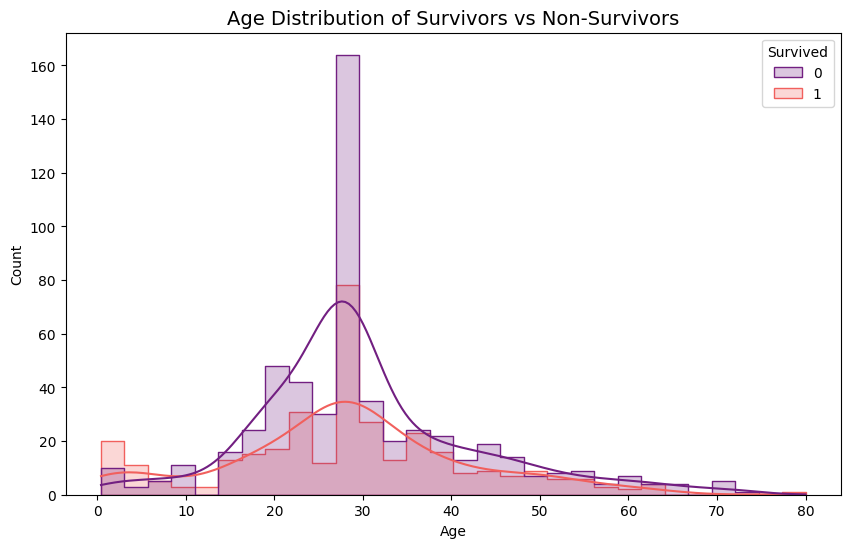

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='Survived', kde=True, element="step", palette='magma')
plt.title('Age Distribution of Survivors vs Non-Survivors', fontsize=14)
plt.show()

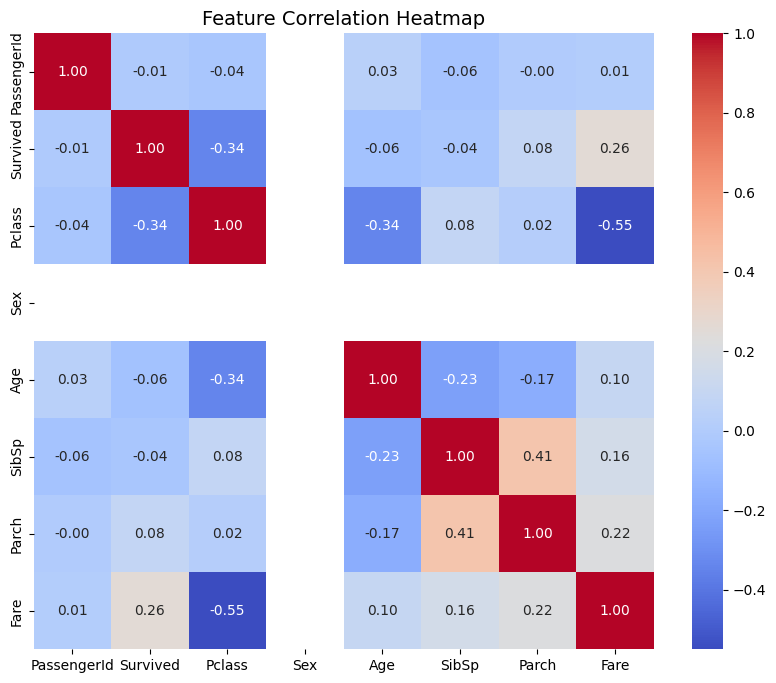

In [ ]:
plt.figure(figsize=(10, 8))
numeric_train = train.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()